In [1]:
# Add project root to Python path
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [2]:
from src.utils import unpack_model
model_path = "../models/black_box_xgboost.pkl"
model = unpack_model(model_path)

In [3]:
from src.preprocessing import get_preprocessed_data
df, prob, predictions, true_labels = get_preprocessed_data()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1085789 entries, 0 to 1085788
Columns: 101 entries, issue_d to loan duration
dtypes: float64(101)
memory usage: 877.2 MB


,issue_d,annual_inc,avg_cur_bal,bc_open_to_buy,bc_util,delinq_2yrs,dti,fico_range_high,funded_amnt,grade,...,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,loan duration
0,-1.687198,-0.740524,-0.745100,0.749353,-1.586968,-0.370362,-1.880551,2.105880,-1.180056,-0.681861,...,3.072340,-0.304431,-0.259342,-0.263757,-0.225089,-0.21671,-0.219908,-0.201924,-0.301189,0.0
1,-1.687198,-0.470993,-0.250548,0.416842,-0.242620,-0.370362,0.530366,1.257840,1.180416,-0.681861,...,-0.325485,-0.304431,-0.259342,-0.263757,-0.225089,-0.21671,-0.219908,-0.201924,-0.301189,0.0
2,-1.687198,4.254544,2.390119,0.248856,0.226836,-0.370362,0.019318,1.766664,1.281200,-1.457840,...,-0.325485,-0.304431,-0.259342,3.791364,-0.225089,-0.21671,-0.219908,-0.201924,-0.301189,0.0
3,-1.687198,0.841656,1.367084,-0.426093,1.147963,-0.370362,-0.633688,0.749016,-0.416218,-0.681861,...,-0.325485,-0.304431,-0.259342,-0.263757,-0.225089,-0.21671,-0.219908,-0.201924,-0.301189,0.0
4,-1.687198,-0.155957,0.630419,-0.342100,0.497128,0.729385,0.561123,-0.947064,1.238765,0.870096,...,-0.325485,-0.304431,-0.259342,-0.263757,4.442678,-0.21671,-0.219908,-0.201924,-0.301189,1.0


### PDP

In [4]:
from src.global_interpretability import PDP_plot
# single-feature PDP plot
feature = "issue_d"
#PDP_plot(df, model, feature)

In [5]:
# 2-feature PDP plot
feature = ["issue_d", "annual_inc"]
#PDP_plot(df, model, feature)

### ICE

In [6]:
from src.local_interpretability import ICE_plot
feature = "issue_d"
#ICE_plot(df, model, feature)

### LIME

### SHAP

### FI

Processed feature 0/101: issue_d, Importance: -0.0169445135761066
Processed feature 1/101: annual_inc, Importance: -0.009129679118588085
Processed feature 2/101: avg_cur_bal, Importance: -0.006727921969568507


/Users/gustavetriomphe/Desktop/HEC/Interpretability-Stability-and-Fairness-project/src/performance_interpretability.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


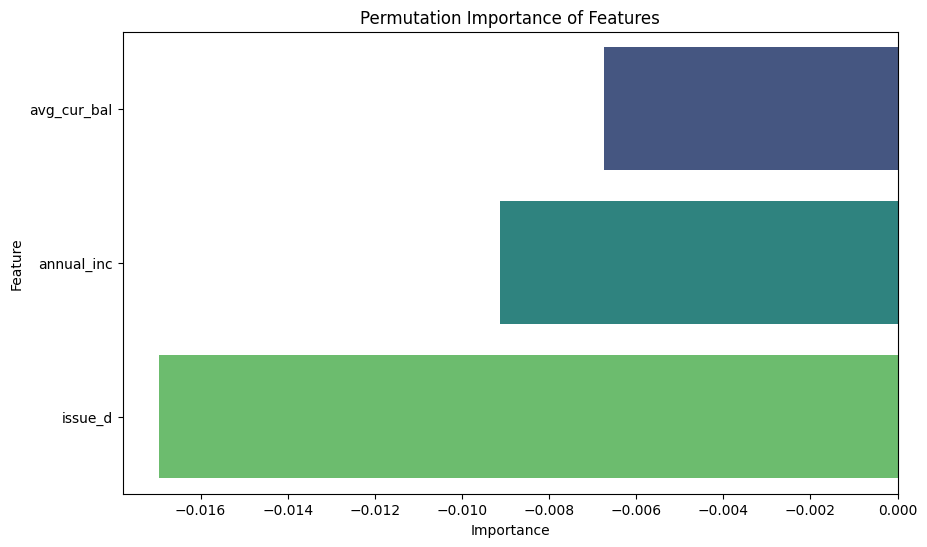

In [7]:
from src.performance_interpretability import PI_plot
from sklearn.metrics import roc_auc_score, accuracy_score

pm = roc_auc_score
y_true = true_labels
features = df.columns.tolist()
PI_plot(df, model, features, pm, y_true)